In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [4]:
# 将csv数据转换为DataFrame数据，方便用pandas进行数据预处理
# 注意将print的注释打开，可以查看输出结果
train_df = pd.read_csv(".\\input\\train.csv",index_col = 0)
test_df = pd.read_csv('.\\input\\test.csv',index_col = 0)

#train_df = pd.read_csv(".\\input\\train.csv")
#test_df = pd.read_csv('.\\input\\test.csv')

print(train_df.shape)
print(test_df.shape)
train_df.head() # 默认展示前五行


(1460, 80)
(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#train_df.info()

<function matplotlib.pyplot.show>

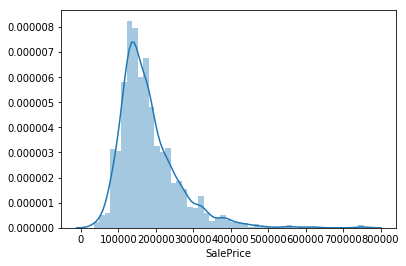

In [7]:
#绘制SalePrice直方图，查看数据分布
sns.distplot(train_df['SalePrice'])
plt.show

In [8]:
print(train_df['SalePrice'].kurt()) #峰度（>0比正态分布陡峭）
print(train_df['SalePrice'].skew()) #偏度（>0,右侧尾巴长）

6.536281860064529
1.8828757597682129


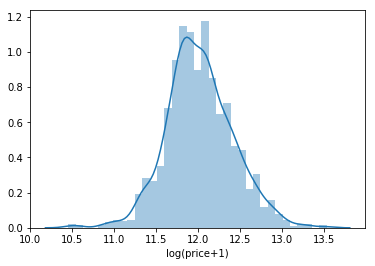

In [9]:
#查看SalePrice数据形状，及用log1p处理后的形状(是数据靠近正太分布)
prices = pd.DataFrame({'price':train_df['SalePrice'],'log(price+1)':np.log1p(train_df['SalePrice'])})
sns.distplot(prices['log(price+1)'])

In [10]:
#提取标签列，并做log处理
#y_train = np.log1p(train_df.pop['SalePrice'])
#y_train = np.log1p(train_df['SalePrice'])
#将训练数据和测试数据合并
full_df = pd.concat([train_df, test_df], axis=0)
print(full_df.shape)

(2919, 80)


In [11]:
#数据清洗Data Clearing：主要是缺失项的处理
missing_data = full_df.isnull().sum().sort_values(ascending=False)
missing_data[missing_data>0]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

In [12]:
#可以用None填补的项目：如PoolQC，表示游泳池的质量，缺失代表此房子没有游泳池
columns_1 = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
            'GarageQual','GarageCond','GarageFinish','GarageYrBlt','GarageType',
           'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType']
for col in columns_1:
    full_df[col].fillna('None',inplace=True)

In [13]:
#以下特征表示面积，比如TotalBsmtSF表示地下室总面积，没有地下室可以用0填补
columns_2 = ['MasVnrArea','BsmtUnfSF','TotalBsmtSF','GarageArea','GarageCars',
            'BsmtFinSF2','BsmtFinSF1']
for col in columns_2:
    full_df[col].fillna(0, inplace=True)

In [14]:
#LotFrontage和LotArea及Neighborhood有较大关系，所以用这两个特征的中位数填补
#full_df['LotFrontage'] = full_df.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [15]:
#因为LotArea是连续型数据，需要将其分为离散数据
full_df["LotArea"] = pd.qcut(full_df.LotArea,10)

In [16]:
full_df.groupby(['LotArea'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                           mean median count
LotArea                                     
(1299.999, 4922.4]    35.741036   34.0   251
(4922.4, 7007.6]      55.460674   52.0   267
(7007.6, 7960.4]      63.008000   62.0   250
(7960.4, 8741.0]      66.964844   65.0   256
(8741.0, 9453.0]      70.106996   70.0   243
(9453.0, 10151.6]     73.972656   75.0   256
(10151.6, 11001.2]    73.650794   75.0   252
(11001.2, 12203.8]    83.377193   82.0   228
(12203.8, 14300.6]    84.991228   85.0   228
(14300.6, 215245.0]   94.188119   90.0   202

In [17]:
# Since some combinations of LotArea and Neighborhood are not available, so we just LotAreaCut alone
full_df['LotFrontage']=full_df.groupby(['LotArea'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [18]:
# fill in with mode
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    full_df[col].fillna(full_df[col].mode()[0], inplace=True)

In [19]:
#检查却是数据是否全部补全
aa=full_df.isnull().sum().sort_values(ascending=False)
aa[aa>0]

SalePrice    1459
dtype: int64

In [20]:
#特征工程feature engineering
#将类型数据转换为one-hot，在这之前，需要将用numerical表示category的转换为string
Num2Str = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in Num2Str:
    full_df[col]=full_df[col].astype(str)

In [21]:
#进行归类
full_df.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                     mean    median count
MSSubClass                               
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          239948.501672  215200.0   299
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52

In [22]:
def map_data():
    full_df["oMSSubClass"] = full_df.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    full_df['oMSZoning'] = full_df['MSZoning'].map({'C(all)':1,'RH':2,'RM':2,'RL':3,'FV':4})
    full_df["oNeighborhood"] = full_df.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    full_df["oCondition1"] = full_df.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    full_df["oBldgType"] = full_df.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    full_df["oHouseStyle"] = full_df.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    full_df["oExterior1st"] = full_df.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    full_df["oMasVnrType"] = full_df.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    full_df["oExterQual"] = full_df.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full_df["oFoundation"] = full_df.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    full_df["oBsmtQual"] = full_df.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    full_df["oBsmtExposure"] = full_df.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    full_df["oHeating"] = full_df.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    full_df["oHeatingQC"] = full_df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full_df["oKitchenQual"] = full_df.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    full_df["oFunctional"] = full_df.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    full_df["oFireplaceQu"] = full_df.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    full_df["oGarageType"] = full_df.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    full_df["oGarageFinish"] = full_df.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    full_df["oPavedDrive"] = full_df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    full_df["oSaleType"] = full_df.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    full_df["oSaleCondition"] = full_df.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
    
    return 'done!'

In [23]:
map_data()

'done!'

In [24]:
#Drop two unwanted features
full_df.drop(['LotArea'],axis=1,inplace=True)
full_df.drop(['SalePrice'],axis=1,inplace=True)

In [25]:
full_df.shape
#full_df.head()
#full_df.info()

(2919, 100)

In [26]:
#Pipeline
class labelenc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        lab = LabelEncoder()
        X["YearBuilt"] = lab.fit_transform(X["YearBuilt"])
        X["YearRemodAdd"] = lab.fit_transform(X["YearRemodAdd"])
        X["GarageYrBlt"] = lab.fit_transform(X["GarageYrBlt"])
        return X

In [27]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X_numeric = X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X

In [28]:
# build pipeline
pipe = Pipeline([
    ('labenc', labelenc()),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [29]:
# save the original data for later use
full2 = full_df.copy()

In [30]:
data_pipe = pipe.fit_transform(full2)

In [31]:
data_pipe.shape

(2919, 405)

In [32]:
data_pipe.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,...,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
Id,,,,,,,,,,,,,,,,,,,,,
1,6.753438,854,0.0,6.561031,0.0,150.0,0.000000,0,2,548.0,...,1,0,1,1,0,0,0,1,0,0
2,7.141245,0,0.0,6.886532,0.0,284.0,0.000000,1,2,460.0,...,1,0,1,1,0,0,1,0,0,0
3,6.825460,866,0.0,6.188264,0.0,434.0,0.000000,1,2,608.0,...,1,0,1,1,0,0,0,1,0,0
4,6.869014,756,0.0,5.379897,0.0,540.0,5.609472,1,1,642.0,...,1,0,1,1,0,1,0,0,0,0
5,7.044033,1053,0.0,6.486161,0.0,490.0,0.000000,1,2,836.0,...,1,0,1,1,0,0,0,1,0,0


In [33]:
scaler = RobustScaler()

In [34]:
#从总数据中分离出训练数据，标签和测试数据
n_train=train_df.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y= train_df.SalePrice

#X_large = X[X>1000].sum().value_counts()
#print(X_Max)

#X中有部分特征数据是空，需要替换处理
X['oMSZoning'].fillna(1, inplace=True) #X中填充空数值
test_X['oMSZoning'].fillna(1, inplace=True)

aa = X.isnull().sum().sort_values(ascending=False)
print(aa[aa>0])

bb = test_X.isnull().sum().sort_values(ascending=False)
print(bb[bb>0])

#X.to_csv('./output/X.csv', index=False)
#对训练数据和测试数据分别转换
X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train_df.SalePrice)
test_X_scaled = scaler.transform(test_X)

Series([], dtype: int64)
Series([], dtype: int64)


In [35]:
#Lasso拟合训练数据，求特征的重要度
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_pipe.columns)
#re Importance",ascending=False)

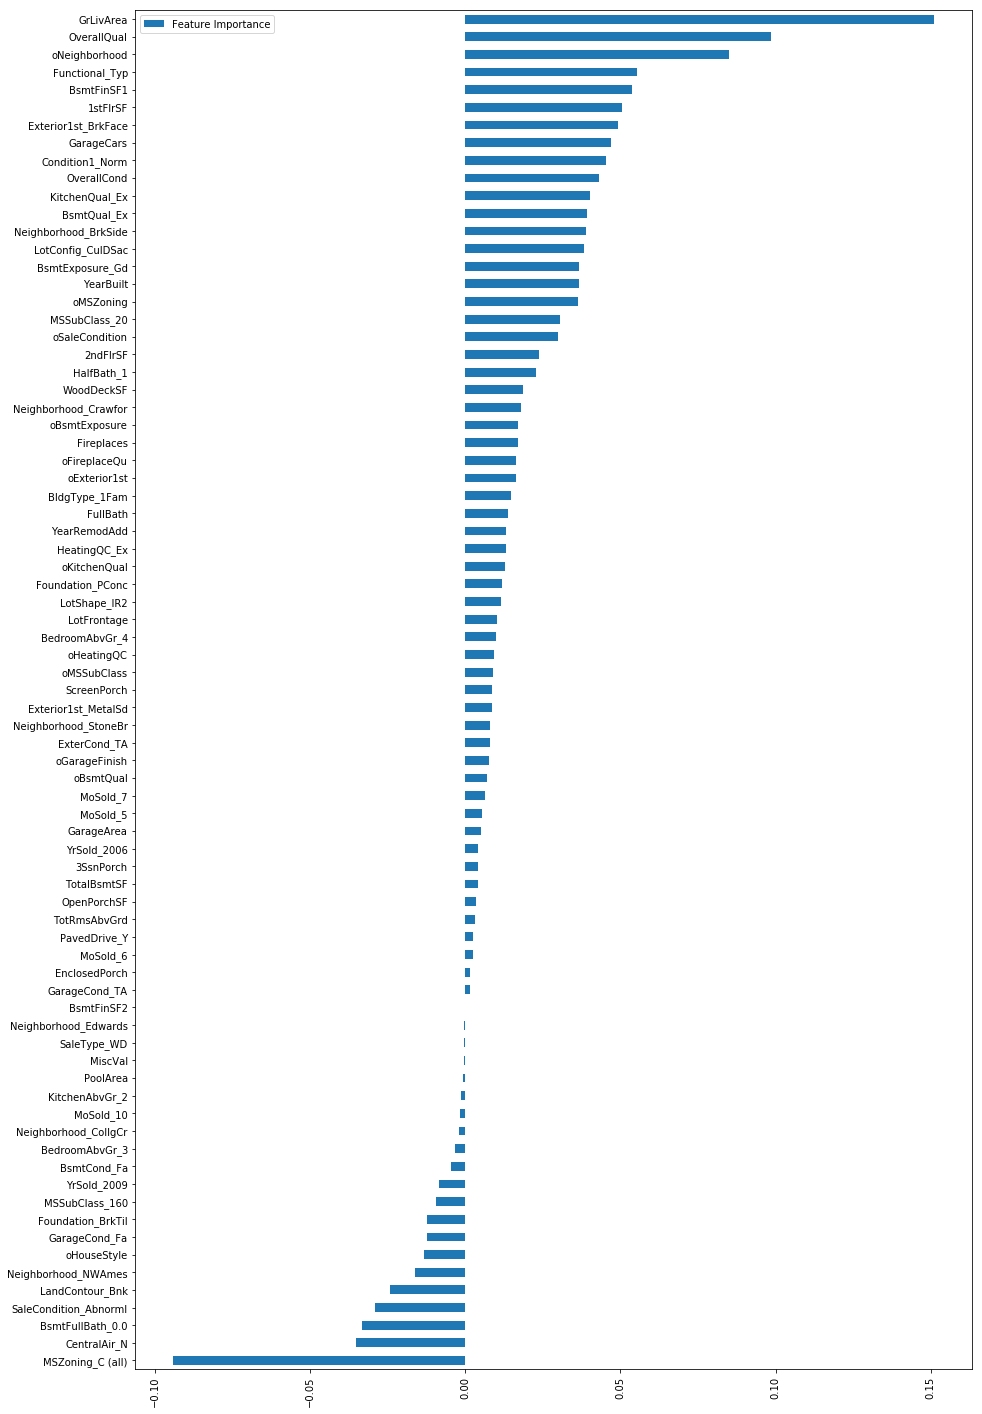

In [37]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [38]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_oMSZoning_TotalHouse"] = X["oMSZoning"] * X["TotalHouse"]
            X["+_oMSZoning_OverallQual"] = X["oMSZoning"] + X["OverallQual"]
            X["+_oMSZoning_YearBuilt"] = X["oMSZoning"] + X["YearBuilt"]
            X["+_oNeighborhood_TotalHouse"] = X["oNeighborhood"] * X["TotalHouse"]
            X["+_oNeighborhood_OverallQual"] = X["oNeighborhood"] + X["OverallQual"]
            X["+_oNeighborhood_YearBuilt"] = X["oNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_oFunctional_TotalHouse"] = X["oFunctional"] * X["TotalHouse"]
            X["-_oFunctional_OverallQual"] = X["oFunctional"] + X["OverallQual"]
            #X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            #X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_oCondition1_TotalHouse"] = X["oCondition1"] * X["TotalHouse"]
            X["-_oCondition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [39]:
pipe = Pipeline([
    ('labenc', labelenc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [40]:
full_pipe = pipe.fit_transform(full_df)

In [41]:
full_pipe.shape

(2919, 424)

In [42]:
#对增加特征后的数据处理
n_train=train_df.shape[0]
X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y= train_df.SalePrice

missing_columns = ['oMSZoning','+_oMSZoning_TotalHouse','+_oMSZoning_OverallQual','+_oMSZoning_YearBuilt']

for col in missing_columns:
    X[col].fillna(1,inplace=True)
    test_X[col].fillna(1,inplace=True)

aa = X.isnull().sum().sort_values(ascending=False)
print(aa[aa>0])

bb = test_X.isnull().sum().sort_values(ascending=False)
print(bb[bb>0])


X_scaled = scaler.fit(X).transform(X)
y_log = np.log(train_df.SalePrice)
test_X_scaled = scaler.transform(test_X)

Series([], dtype: int64)
Series([], dtype: int64)


In [43]:
pca = PCA(n_components=410)

In [44]:
X_scaled = pca.fit_transform(X_scaled)
test_X_scaled = pca.transform(test_X_scaled)

In [45]:
X_scaled.shape, test_X_scaled.shape

((1460, 410), (1459, 410))

In [46]:
# define cross validation strategy
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [47]:
#We choose 13 models and use 5-folds cross-calidation to evaluate these models.
models = [LinearRegression(),
          Ridge(),
          Lasso(alpha=0.01,max_iter=10000),
          RandomForestRegressor(),
          GradientBoostingRegressor(),
          SVR(),
          LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),
          SGDRegressor(max_iter=1000,tol=1e-3),
          BayesianRidge(),
          KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),
          XGBRegressor()]

In [48]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_scaled, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 4488314299.634896, 6190696821.0782
Ridge: 0.135024, 0.0169
Lasso: 0.131647, 0.0122
RF: 0.152300, 0.0122
GBR: 0.133791, 0.0115
SVR: 0.121916, 0.0128
LinSVR: 0.147644, 0.0235
Ela: 0.124826, 0.0142
SGD: 0.172563, 0.0157
Bay: 0.125551, 0.0149
Ker: 0.122403, 0.0144
Extra: 0.150101, 0.0104
Xgb: 0.133740, 0.0117


In [49]:
#接下来建立一个调参的方法，应时刻牢记评估指标是RMSE，所以打印出的分数也要是RMSE
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [50]:
#Lasso的调参
grid(Lasso()).grid_get(X_scaled,y_log,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0009, 'max_iter': 10000} 0.1249816384950075
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.126227        0.003688
1  {'alpha': 0.0005, 'max_iter': 10000}         0.125723        0.003566
2  {'alpha': 0.0007, 'max_iter': 10000}         0.125154        0.003435
3  {'alpha': 0.0006, 'max_iter': 10000}         0.125412        0.003483
4  {'alpha': 0.0009, 'max_iter': 10000}         0.124982        0.003405
5  {'alpha': 0.0008, 'max_iter': 10000}         0.125039        0.003416


In [51]:
#经过漫长的多轮，最后选择了这六个模型：
lasso = Lasso(alpha=0.0005,max_iter=10000)
ridge = Ridge(alpha=60)
svr = SVR(gamma= 0.0004,kernel='rbf',C=13,epsilon=0.009)
ker = KernelRidge(alpha=0.2 ,kernel='polynomial',degree=3 , coef0=0.8)
ela = ElasticNet(alpha=0.005,l1_ratio=0.08,max_iter=10000)
bay = BayesianRidge()

In [52]:
#Ensemble Methods/集成方法
#根据权重对各个模型加权平均
class AverageWeight(BaseEstimator, RegressorMixin):
    def __init__(self,mod,weight):
        self.mod = mod
        self.weight = weight
        
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.mod]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model,weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [53]:
# assign weights based on their gridsearch score
w1 = 0.02
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.03
w6 = 0.2

In [54]:
weight_avg = AverageWeight(mod = [lasso,ridge,svr,ker,ela,bay],weight=[w1,w2,w3,w4,w5,w6])

In [55]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.12093970594502026


In [56]:
#只用两个模型svr，ker
weight_avg = AverageWeight(mod = [svr,ker],weight=[0.5,0.5])

In [57]:
score = rmse_cv(weight_avg,X_scaled,y_log)
print(score.mean())

0.12009362888321176


In [58]:
#Stacking
class stacking(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,mod,meta_model):
        self.mod = mod
        self.meta_model = meta_model
        self.kf = KFold(n_splits=5, random_state=42, shuffle=True)
        
    def fit(self,X,y):
        self.saved_model = [list() for i in self.mod]
        oof_train = np.zeros((X.shape[0], len(self.mod)))
        
        for i,model in enumerate(self.mod):
            for train_index, val_index in self.kf.split(X,y):
                renew_model = clone(model)
                renew_model.fit(X[train_index], y[train_index])
                self.saved_model[i].append(renew_model)
                oof_train[val_index,i] = renew_model.predict(X[val_index])
        
        self.meta_model.fit(oof_train,y)
        return self
    
    def predict(self,X):
        whole_test = np.column_stack([np.column_stack(model.predict(X) for model in single_model).mean(axis=1) 
                                      for single_model in self.saved_model]) 
        return self.meta_model.predict(whole_test)
    
    def get_oof(self,X,y,test_X):
        oof = np.zeros((X.shape[0],len(self.mod)))
        test_single = np.zeros((test_X.shape[0],5))
        test_mean = np.zeros((test_X.shape[0],len(self.mod)))
        for i,model in enumerate(self.mod):
            for j, (train_index,val_index) in enumerate(self.kf.split(X,y)):
                clone_model = clone(model)
                clone_model.fit(X[train_index],y[train_index])
                oof[val_index,i] = clone_model.predict(X[val_index])
                test_single[:,j] = clone_model.predict(test_X)
            test_mean[:,i] = test_single.mean(axis=1)
        return oof, test_mean

In [59]:
# must do imputer first, otherwise stacking won't work, and i don't know why.
a = Imputer().fit_transform(X_scaled)
b = Imputer().fit_transform(y_log.values.reshape(-1,1)).ravel()

In [60]:
#Stack model用了Lasso，Ridge，SVR，Kernel Ridge，ElasticNet，BayesianRidge作为第一层模型，Kernel Ridge作为第二层模型
# This is the final model I use
stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [61]:
score = rmse_cv(stack_model,a,b) #用原始特征训练stack model
print(score.mean())

0.12482840347882951


In [62]:
#用get_oof的方法将第一层模型的特征矩阵提取出来，再和原始特征进行拼接，最后的cv分数下降
X_train_stack, X_test_stack = stack_model.get_oof(a,b,test_X_scaled)

In [63]:
X_train_stack.shape, a.shape #stack特征，原特征

((1460, 6), (1460, 410))

In [64]:
X_train_add = np.hstack((a,X_train_stack)) #训练集：将stack特征和原始特征合并
X_test_add = np.hstack((test_X_scaled,X_test_stack)) #测试集：将stack特征和原始特征合并

In [65]:
X_train_add.shape, X_test_add.shape

((1460, 416), (1459, 416))

In [66]:
#get_oof的特征和原特征合并后训练stack模型
score = rmse_cv(stack_model,X_train_add,b)
print(score.mean())

0.10515743674343733


In [67]:
stack_model.fit(X_train_add,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=0.8, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
     mod=[Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=60, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=No...True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)])

In [93]:
# This is the final model I use
#stack_model = stacking(mod=[lasso,ridge,svr,ker,ela,bay],meta_model=ker)

In [94]:
#stack_model.fit(a,b)

stacking(meta_model=KernelRidge(alpha=0.2, coef0=0.8, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None),
     mod=[Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False), Ridge(alpha=60, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=No...True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)])

In [69]:
#测试集预测，用exp函数将y恢复
pred = np.exp(stack_model.predict(test_X_scaled)) #测试集：原始特征
#pred = np.exp(stack_model.predict(X_test_add))   #测试集：原始特征＋stack特征

In [70]:
#输出submission
#使用stack特征+原始特征虽然训练误差和测试误差均小，但实际kaggle提交结果更差，应该是有过拟合
#所以建议最终使用原始特征
test_df = pd.read_csv('.\\input\\test.csv')
result = pd.DataFrame({'Id':test_df.Id, 'SalePrice':pred})
result.to_csv(".\output\submission.csv",index=False)